# Lorenz attractor

Consider the Lorenz attractor, a 3-D system defined by the equations

\begin{eqnarray*}
\dot{x} & = & \sigma(y-x)\\
\dot{y} & = & x(\rho-z)-y\\
\dot{z} & = & xy-\beta z
\end{eqnarray*}

See the [Wikipedia page](http://en.wikipedia.org/wiki/Lorenz_system) for a discussion. Here, all right-hand sides are multiplied by a factor $\omega$ to adjust the speed.

In [1]:
import logging; logging.basicConfig(level=logging.WARNING); logging.captureWarnings(True)
from numpy import array,amin,amax
from ipyshow.odesimu import System

## LorenzAttractor class

In [2]:
#----------------------------------------------------------------------------------------------------
class LorenzAttractor (System):
#----------------------------------------------------------------------------------------------------

  def __init__(self,σ,ρ,β,ω):
    r"""
Args:
  σ,ρ,β (float): parameters of the Lorenz attractor
  ω (float): speed control [sec^-1]
    """
    def fun(t,state):
      x,y,z = state
      return ω*array((σ*(y-x),x*(ρ-z)-y,x*y-β*z))
    self.fun = fun
    def jac(t,state):
      x,y,z = state
      return ω*array(((-σ,σ,0),(ρ-z,-1,-x),(y,x,-β)))
    self.jac = jac

  def displayer(self,env,ax):
    # relim3d does not exist in matplotlib
    def relim3d(ax,x,y,z,bnd=(lambda a,srtd=(lambda v: v[0]<v[1]): b if srtd(b:=(amin(a),amax(a))) else ())):
      ax.set_xlim(*bnd(x));ax.set_ylim(*bnd(y));ax.set_zlim(*bnd(z))
    ax.set_title(r'trajectory:?',fontsize='x-small')
    a_position = ax.scatter((),(),(),marker='o',c='b')
    a_tail, = ax.plot((),(),(),c='y')
    def disp():
      x,y,z = env.state[:,None]
      a_position._offsets3d = x,y,z
      x,y,z = env.cached_states
      a_tail.set_data_3d(x,y,z)
      relim3d(ax,x,y,z)
      ax.autoscale_view()
    return disp

  @staticmethod
  def makestate(x,y,z):
    r"""
Args:
  x,y,z (float): position of the system
    """
    return array((x,y,z),dtype=float)

  launch_defaults = {'period':10.,'cache_spec':(500,.05),'max_step':.1}

In [3]:
%matplotlib widget
#%matplotlib qt6
from myutil.simpy import SimpySimulation

IPYControlledAnimation(children=(VBox(children=(HBox(children=(SimpleButton(icon='close', layout=Layout(paddin…

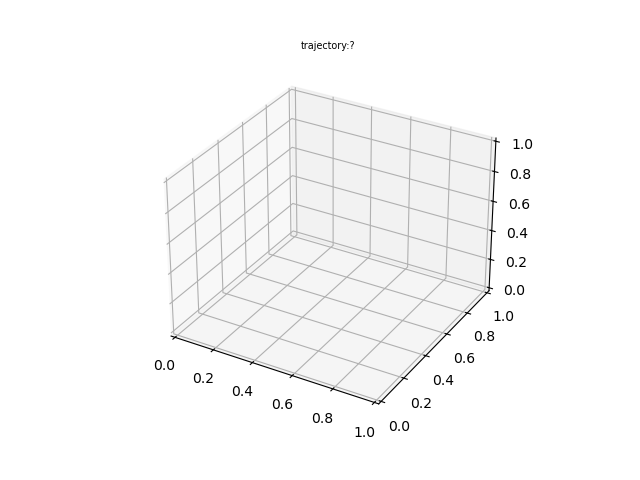

In [6]:
logging.basicConfig(level='WARN')

syst = LorenzAttractor(σ=10,ρ=28,β=8/3,ω=.2)
ini=dict(x=-1,y=2,z=12)

SimpySimulation(
  syst.launch(init_y=ini,method='DOP853'),
  frame_per_stu=25,track=60.,
  panes_kw={
    'projection':'3d',
    'aspect':'auto' # required because default ('equal') is not supported by 3d
  }
)